# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./dataset.csv')

Show some information and statistics about the dataset

In [3]:
df.shape

(2312, 14)

In [42]:
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Continent_company,Sub-region_company,Continent_origin,Sub-region_origin
0,2454.0,5150,U.S.A.,2019.0,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,Americas,Northern America,Africa,Sub-Saharan Africa
1,2458.0,5150,U.S.A.,2019.0,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,Americas,Northern America,Americas,Latin America and the Caribbean
2,2454.0,5150,U.S.A.,2019.0,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,Americas,Northern America,Africa,Sub-Saharan Africa
3,797.0,A. Morin,France,2012.0,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75,Europe,Western Europe,Americas,Latin America and the Caribbean
4,797.0,A. Morin,France,2012.0,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50,Europe,Western Europe,Americas,Latin America and the Caribbean


In [5]:
df.columns

Index(['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics',
       'Rating', 'Continent_company', 'Sub-region_company', 'Continent_origin',
       'Sub-region_origin'],
      dtype='object')

In [55]:
df.describe(include='all')

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Continent_company,Sub-region_company,Continent_origin,Sub-region_origin,Manifacturer
count,2312.000000,2312,2312,2312.000000,2312,2312,2312.000000,2224,2312,2312.000000,2312,2312,2312,2312,239
unique,NaN,541,63,NaN,56,1436,NaN,21,2270,NaN,5,13,5,10,51
top,NaN,Soma,U.S.A.,NaN,Venezuela,Madagascar,NaN,"3- B,S,C","creamy, nutty, cocoa",NaN,Americas,Northern America,Americas,Latin America and the Caribbean,Felchlin
freq,NaN,52,966,NaN,245,55,NaN,885,4,NaN,1369,1127,1602,1572,36
mean,1317.821367,NaN,NaN,2013.760813,NaN,NaN,71.647708,NaN,NaN,3.184083,NaN,NaN,NaN,NaN,NaN
std,695.425750,NaN,NaN,3.591105,NaN,NaN,5.765289,NaN,NaN,0.451961,NaN,NaN,NaN,NaN,NaN
min,5.000000,NaN,NaN,2006.000000,NaN,NaN,42.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,741.000000,NaN,NaN,2011.000000,NaN,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
50%,1351.000000,NaN,NaN,2014.000000,NaN,NaN,70.000000,NaN,NaN,3.250000,NaN,NaN,NaN,NaN,NaN
75%,1912.000000,NaN,NaN,2016.000000,NaN,NaN,75.000000,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,NaN


## Data Exploration

### Rating (target variable)

In [7]:
df['Rating'].describe()

count    2312.000000
mean        3.184083
std         0.451961
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: Rating, dtype: float64

Let's check rating distribution.

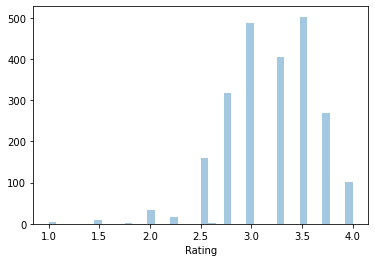

In [8]:
sns.distplot(df['Rating'], kde=False);

Let's plot a correlation matrix to check whether the rating is correlated to any numerical variable.

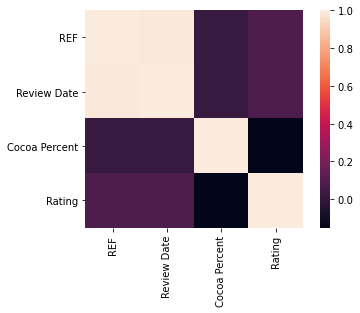

In [9]:
corrmat = df.corr()
sns.heatmap(corrmat, square=True);

It looks like Rating is not correlated to any of them.

However this plot confirms, as we expected from the dataset description, that REF is correlated with Review Date.

---

### Which companies are the top rated?

Let's see how the ratings change among different companies. We create a pivot table which tells us, for each company, the average rating and the number of reviews.

In [10]:
pivot_companies = pd.pivot_table(df, values='Rating', 
                                 index='Company (Manufacturer)',  
                                 aggfunc=[np.mean, len])
pivot_companies.head()

,mean,len
,Rating,Rating
Company (Manufacturer),,
5150,3.5000,3.0
A. Morin,3.4000,25.0
AMMA,3.5000,5.0
Acalli,3.5625,4.0
Adi aka Fijiana (Easy In Ltd),3.2500,4.0


Let's show the top 10 companies for average rating which have more than 10 reviews.

In [11]:
pivot_companies[pivot_companies[('len', 'Rating')]>10].sort_values(('mean', 'Rating'), ascending=False).head(10)

,mean,len
,Rating,Rating
Company (Manufacturer),,
Soma,3.591346,52.0
Brasstown aka It's Chocolate,3.583333,12.0
Ritual,3.541667,12.0
Friis Holm,3.538462,13.0
Arete,3.531250,32.0
"Smooth Chocolator, The",3.514706,17.0
Domori,3.500000,23.0
Bonnat,3.456897,29.0


Now let's see which are the 40 most reviewed companies and plot the corresponding rating distribution.

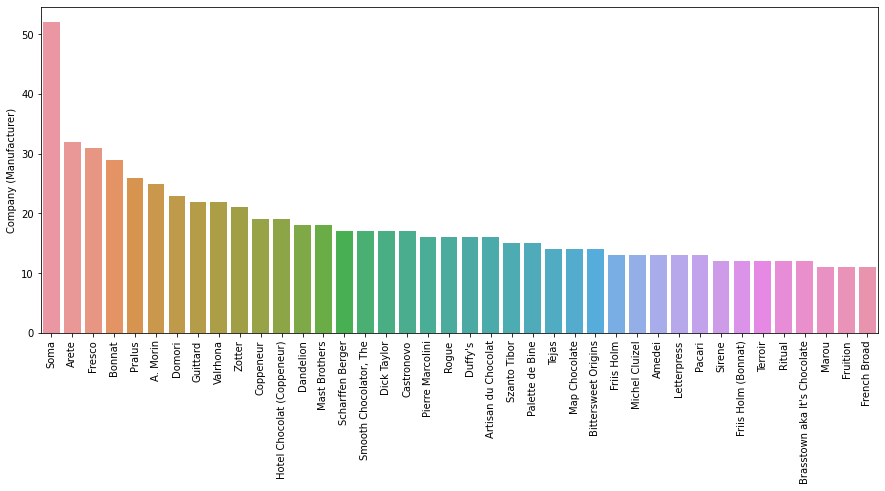

In [12]:
values = df['Company (Manufacturer)'].value_counts()[:40]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

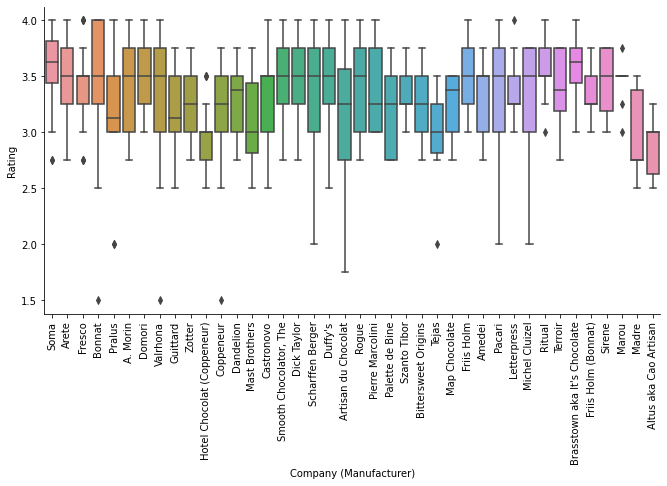

In [13]:
most_freq = df['Company (Manufacturer)'].value_counts()[:40].index
sns.catplot(x="Company (Manufacturer)", y="Rating", 
            kind="box", 
            aspect=2, 
            order=most_freq, 
            data=df[df['Company (Manufacturer)'].isin(most_freq)])
plt.xticks(rotation=90);

### Where are most companies located?

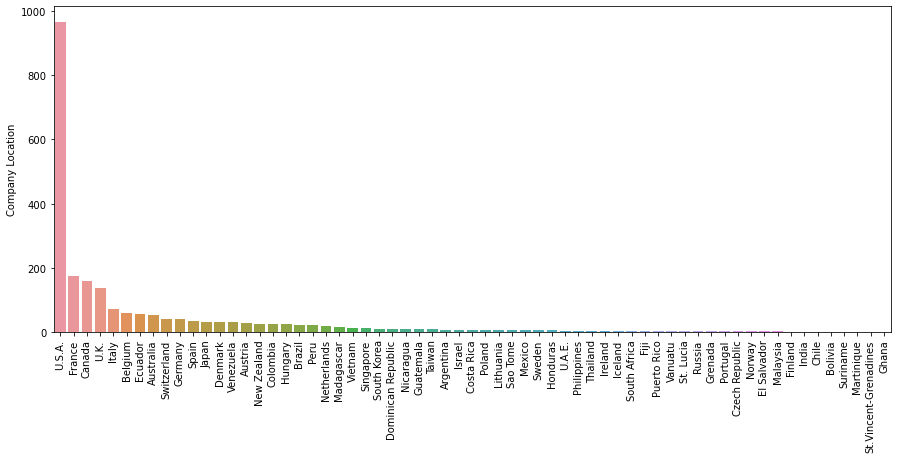

In [14]:
values = df['Company Location'].value_counts()
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

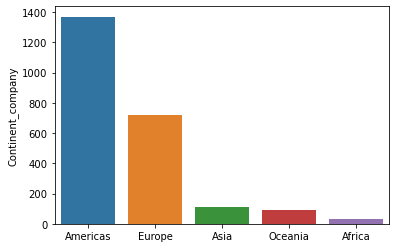

In [15]:
values = df['Continent_company'].value_counts()
sns.barplot(x=values.index, y=values);

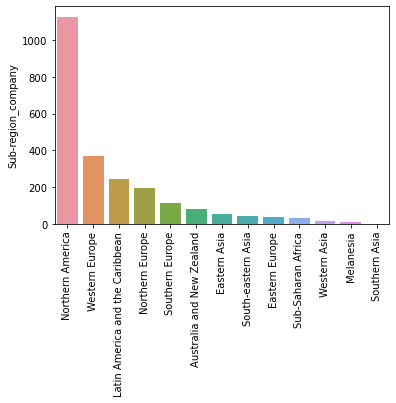

In [17]:
values = df['Sub-region_company'].value_counts()
fig, ax = plt.subplots()
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

We see that most of the bars reviewed are produced by U.S. companies, and about half of them are produced in Northern America.

Let's now check the rating of different locations. We create a pivot table where, for each location, we calculate the average rating, the number of reviews and the number of distinct companies.

In [66]:
def num_companies(data):
    return data.nunique()

pivot_locations = pd.pivot_table(df, values=['Rating', 'Company (Manufacturer)'], 
                                 index='Company Location',  
                                 aggfunc={'Rating':[np.mean, len],
                                          'Company (Manufacturer)':num_companies})
pivot_locations.head()

Company (Manufacturer) Rating          
                          num_companies    len      mean
Company Location                                        
Argentina                             2    9.0  3.305556
Australia                            12   53.0  3.358491
Austria                               3   30.0  3.258333
Belgium                              14   59.0  3.105932
Bolivia                               1    2.0  3.250000

Here are the top 10 company locations for average rating:

In [67]:
pivot_locations[pivot_locations[('Rating', 'len')]>10].sort_values(('Rating', 'mean'), ascending=False).head(10)

Company (Manufacturer) Rating          
                          num_companies    len      mean
Company Location                                        
Australia                            12   53.0  3.358491
Denmark                               4   31.0  3.338710
Vietnam                               4   15.0  3.333333
Switzerland                          10   43.0  3.313953
Canada                               31  161.0  3.301242
Brazil                               10   24.0  3.281250
Spain                                 8   36.0  3.263889
Austria                               3   30.0  3.258333
France                               25  175.0  3.250000
Netherlands                           6   20.0  3.237500

Let's plot the distribution of ratings in the 40 most reviewed company locations.

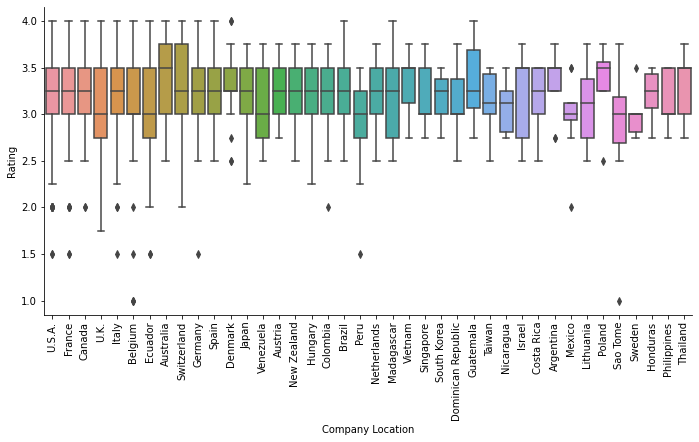

In [12]:
most_freq = df['Company Location'].value_counts()[:40].index
sns.catplot(x="Company Location", y="Rating", 
            kind="box", 
            aspect=2, 
            order=most_freq, 
            data=df[df['Company Location'].isin(most_freq)])
plt.xticks(rotation=90);

### Country of origin

Let's see where the chocolate beans of the reviewed bars come from.

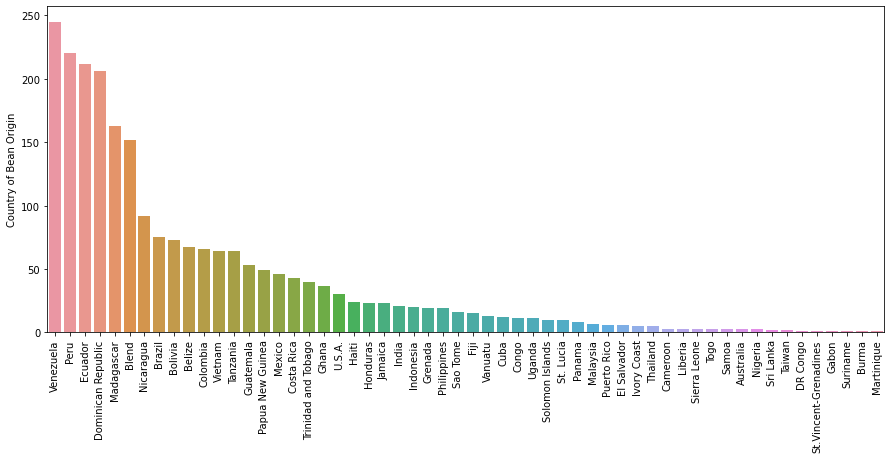

In [59]:
values = df['Country of Bean Origin'].value_counts()
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

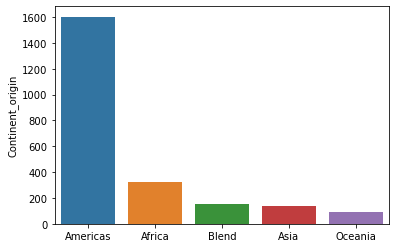

In [60]:
values = df['Continent_origin'].value_counts()
sns.barplot(x=values.index, y=values);

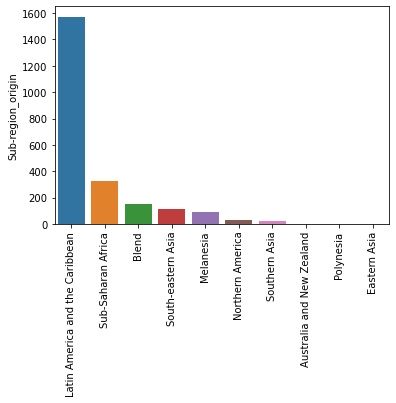

In [61]:
values = df['Sub-region_origin'].value_counts()
fig, ax = plt.subplots()
sns.barplot(x=values.index, y=values)
plt.xticks(rotation=90);

Let's now check the rating of different locations. We create a pivot table where, for each location, we calculate the average rating, the number of reviews and the number of distinct companies.

In [63]:
pivot_origin = pd.pivot_table(df, values=['Rating', 'Company (Manufacturer)'], 
                                 index='Country of Bean Origin',  
                                 aggfunc={'Rating':[np.mean, len],
                                          'Company (Manufacturer)':num_companies})
pivot_origin.head()

Company (Manufacturer) Rating          
                                num_companies    len      mean
Country of Bean Origin                                        
Australia                                   2    3.0  3.250000
Belize                                     58   67.0  3.227612
Blend                                      70  152.0  3.034539
Bolivia                                    56   73.0  3.181507
Brazil                                     51   75.0  3.253333

Here are the top 10 countries of bean origin for average rating:

In [69]:
pivot_origin[pivot_origin[('Rating', 'len')]>10].sort_values(('Rating', 'mean'), ascending=False).head(10)

Company (Manufacturer) Rating          
                                num_companies    len      mean
Country of Bean Origin                                        
Congo                                       9   11.0  3.318182
Cuba                                       10   12.0  3.291667
Guatemala                                  40   53.0  3.273585
Haiti                                      22   24.0  3.270833
Papua New Guinea                           39   49.0  3.270408
Madagascar                                119  163.0  3.260736
Vietnam                                    47   64.0  3.253906
Brazil                                     51   75.0  3.253333
Nicaragua                                  48   92.0  3.239130
Trinidad and Tobago                        36   40.0  3.237500

Plot distribution of rating of most frequent countries of origin.

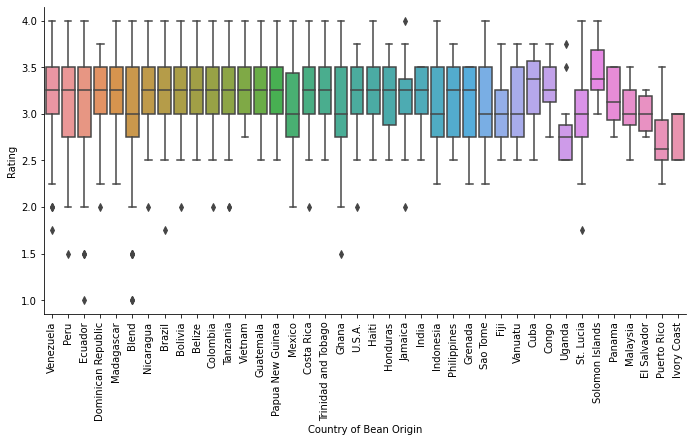

In [13]:
most_freq = df['Country of Bean Origin'].value_counts()[:40].index
sns.catplot(x="Country of Bean Origin", y="Rating", 
            kind="box", 
            aspect=2, 
            order=most_freq, 
            data=df[df['Country of Bean Origin'].isin(most_freq)])
plt.xticks(rotation=90);

Plot distribution of rating of most frequent continents of origin.

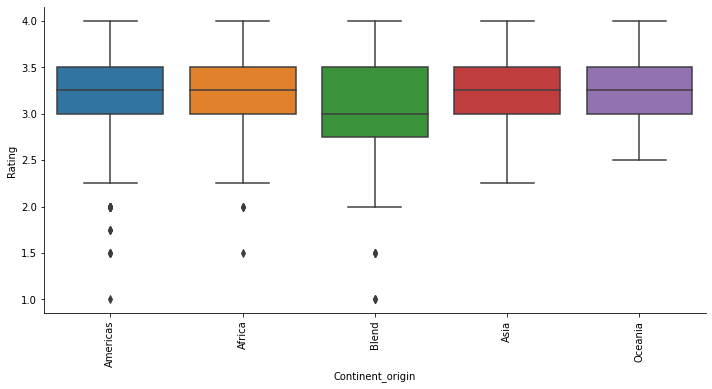

In [14]:
most_freq = df['Continent_origin'].value_counts()[:40].index
sns.catplot(x="Continent_origin", y="Rating", 
            kind="box", 
            aspect=2, 
            order=most_freq, 
            data=df[df['Continent_origin'].isin(most_freq)])
plt.xticks(rotation=90);

Plot distribution of rating of most frequent sub-regions of origin.

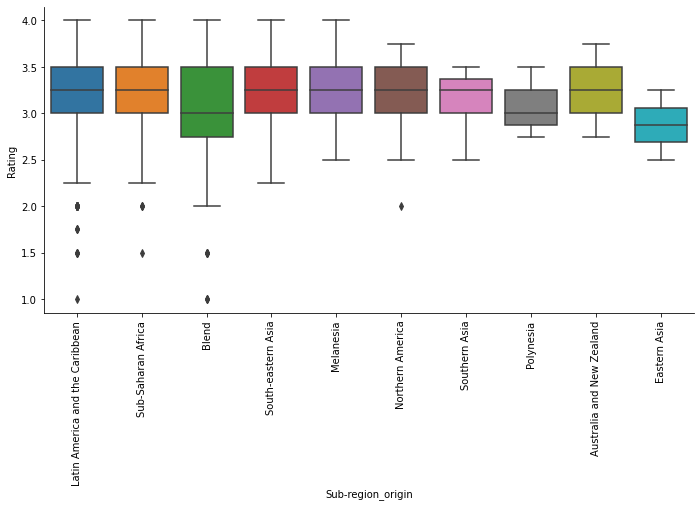

In [15]:
most_freq = df['Sub-region_origin'].value_counts()[:40].index
sns.catplot(x="Sub-region_origin", y="Rating", 
            kind="box", 
            aspect=2, 
            order=most_freq, 
            data=df[df['Sub-region_origin'].isin(most_freq)])
plt.xticks(rotation=90);

### Ingredients

From http://flavorsofcacao.com:

> "#" = represents the number of ingredients in the chocolate; B = Beans, S = Sugar, S* = Sweetener other than white cane or beet sugar, C = Cocoa Butter, V = Vanilla, L = Lecithin, Sa = Salt

For each of the above ingredients, let's create a column which indicates whether that ingredient is used or not.

In [71]:
# Remove numbers, dashes and spaces
df['Ingredients'] = df['Ingredients'].str.replace('[\s\d-]', '')

ingredient_dummies = df['Ingredients'].str.get_dummies(sep=',')
ingredient_dummies.head()

,B,C,L,S,S*,Sa,V
0,1,1,0,1,0,0,0
1,1,1,0,1,0,0,0
2,1,1,0,1,0,0,0
3,1,1,1,1,0,0,0
4,1,1,1,1,0,0,0


Let's plot for each ingredient the number of bars that contain it.

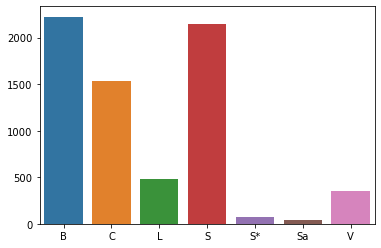

In [74]:
values = ingredient_dummies.sum()
sns.barplot(x=values.index, y=values);

Note that some values of the ingredient column are missing and the corresponding dummies are all 0:

In [29]:
ingredient_dummies[df.isna().any(axis=1)].head()

,B,C,L,S,S*,Sa,V
80,0,0,0,0,0,0,0
81,0,0,0,0,0,0,0
161,0,0,0,0,0,0,0
283,0,0,0,0,0,0,0
307,0,0,0,0,0,0,0


We replace these missing values by the mean of the corresponding dummy variable.

In [30]:
ingr_means = ingredient_dummies.drop(ingredient_dummies[df.isna().any(axis=1)].index).mean()
ingredient_dummies[df.isna().any(axis=1)] += ingr_means

### Most Memorable Characteristics

In [101]:
contains('bitter').sum()

124

In [95]:
characteristics_list = ['nutty', 'fruit', 'floral', 'spicy', 'cocoa', 'earthy', 
                        'sweet', 'sour', 'roasty', 'dairy', 'grass', 'pungent', 
                        'mouldy', 'dirty', 'musty', 'smokey', 'rubbery', 'hammy', 
                        'bland', 'petroleum', 'off', 'bitter', 'astringent']

In [96]:
def contains(w):
    return df['Most Memorable Characteristics'].str.contains(w) + 0

for ch in characteristics_list:
    df[ch] = contains(ch)

In [97]:
df[characteristics_list].sum()

nutty         260
fruit         289
floral        152
spicy         143
cocoa         350
earthy        182
sweet         289
sour          185
roasty        209
dairy          47
grass          62
pungent        36
mouldy          0
dirty          22
musty          12
smokey         50
rubbery        23
hammy          34
bland          21
petroleum       0
off           203
astringent     41
dtype: int64

In [100]:
df['Most Memorable Characteristics'].head()

0    cocoa, blackberry, full body
1          cocoa, vegetal, savory
2       rich cocoa, fatty, bready
3           fruity, melon, roasty
4                  vegetal, nutty
Name: Most Memorable Characteristics, dtype: object

In [17]:
# Adjust spelling
replaces = {
    'accesible': 'accessible',
    'alocohol': 'alcohol',
    'astingent': 'astringent',
    'brownine': 'brownie',
    'cardamon': 'cardamom',
    'cinamon': 'cinnamon',
    'cocounut': 'coconut',
    'earty': 'earthy',
    'astringcy': 'astringency',
    'astringnet': 'astringent',
    'hit': 'hint',
    'overyly': 'overly',
    'peanutbutter': 'peanut butter',
    'prononced': 'pronounced',
    'rainins': 'raisins',
    'raisns': 'raisins',
    'rasins': 'raisins',
    'cooa': 'cocoa',
    'sl.': 'slight',
    'sliglty': 'slightly',
    'smomkey': 'smokey',
    'smoth': 'smooth',
    'trop.': 'tropical',
    '(n)': '',
}

for (key, val) in replaces.items():
    df['Most Memorable Characteristics'] = df['Most Memorable Characteristics'].apply(lambda s: s.lower().replace(key, val))

In [37]:
stop_words = ['note', 'notes', 'almost', 'with', 'w/', '/', 'flavor', 'then', 
              'like', 'by', 'but', 'mostly', 'to', 'and', '&', 'is', 'of']

In [40]:
def stem_characteristics(s):
    from nltk.stem import PorterStemmer 
    from nltk.tokenize import word_tokenize 

    stemmer = PorterStemmer()  
    
    words = word_tokenize(s)
    words = [stemmer.stem(w) for w in words if not w in stop_words]
    
    return ' '.join(words)

In [39]:
preprocessed_chars = df['Most Memorable Characteristics'].apply(
    lambda s: s.lower().replace(key, val)
    ).apply(stem_characteristics)
preprocessed_chars

0       cocoa , blackberri , full bodi
1               cocoa , veget , savori
2          rich cocoa , fatti , breadi
3              fruiti , melon , roasti
4                        veget , nutti
                     ...              
2307               waxi , cloy , veget
2308        strong nutti , marshmallow
2309            mute , roasti , access
2310     fatti , mild nut , mild fruit
2311            fatti , earthi , cocoa
Name: Most Memorable Characteristics, Length: 2312, dtype: object

In [113]:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words=stop_words, max_features=100)
transformed_chars = vectorizer.fit_transform(preprocessed_chars)

In [120]:
tokens_to_words = {v: k for (k, v) in vectorizer.vocabulary_.items()}
characteristic_dummies = pd.DataFrame(transformed_chars.todense()).rename(tokens_to_words, axis=1)
characteristic_dummies.head()

,acid,astring,balanc,banana,basic,basic cocoa,berri,bitter,black,black pepper,...,strawberri,strong,sweet,tangi,tart,tobacco,vanilla,veget,veri,woodi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [122]:
counts = characteristic_dummies.sum().sort_values(ascending=False)
counts

cocoa           351
sweet           289
nutti           260
fruit           236
mild            210
               ... 
creami nutti     18
coconut          17
milk             17
light            17
balanc           17
Length: 100, dtype: int64

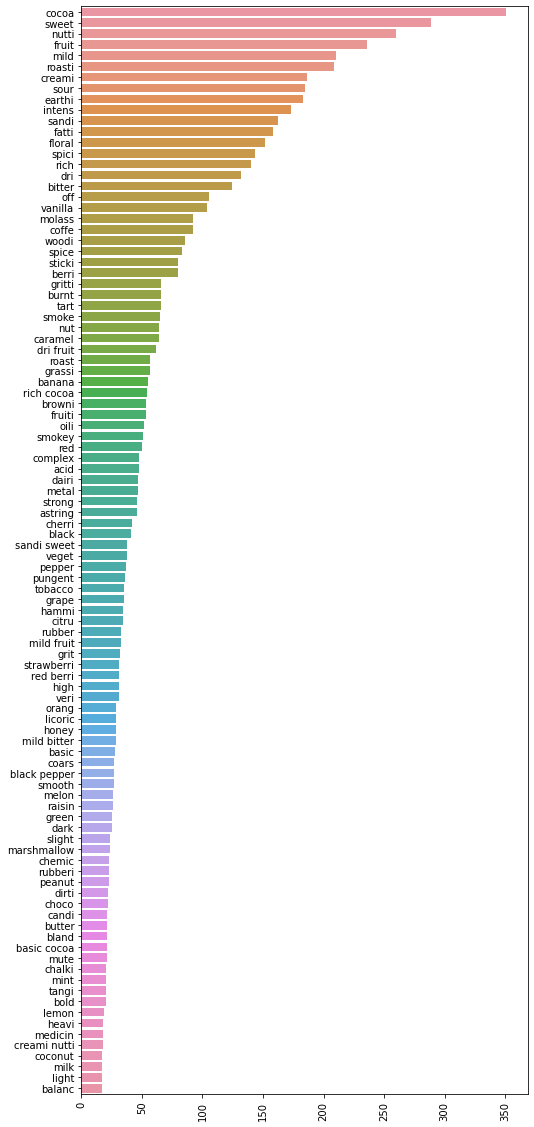

In [124]:
fig, ax = plt.subplots(figsize=(8, 20))
sns.barplot(y=counts.index, x=counts)
plt.xticks(rotation=90);

In [91]:
characteristic_dummies = df['Most Memorable Characteristics'].apply(stem_characteristics)
characteristic_dummies = characteristic_dummies.str.get_dummies(sep='|')
characteristic_dummies.head()

,access,acid,add,aftertast,alcohol,alkalyz,allur,almond,aluminum,ambigu,...,wild,wine,winey,wood,woodi,woodsi,wtf,xl,yellow,yogurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's show the most frequent characteristics

In [83]:
values = (characteristic_dummies.sum()).sort_values(ascending=False)
values.head(10)

cocoa     351
sweet     289
nutti     260
fruit     236
roasti    209
mild      200
creami    186
sour      185
earthi    183
intens    173
dtype: int64

In [15]:
(values>15).sum()

82

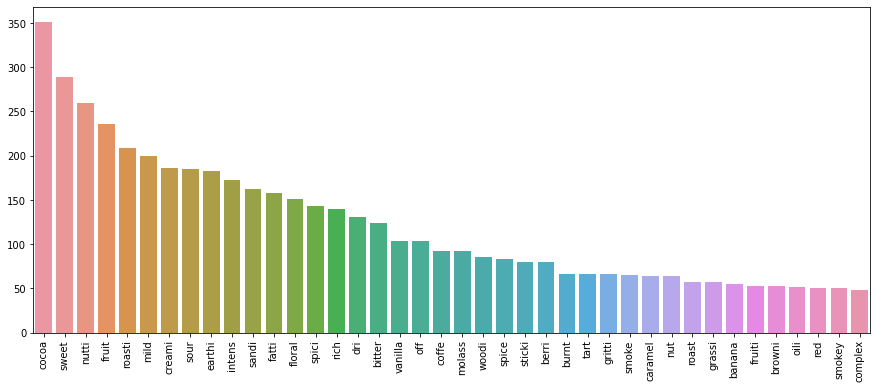

In [84]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=values[:40].index, y=values[:40])
plt.xticks(rotation=90);

In [93]:
corr = pd.concat([df[['Rating']], characteristic_dummies], axis=1).corr()

In [94]:
corr['Rating'].sort_values(ascending=False)

Rating     1.000000
creami     0.193598
cocoa      0.177086
rich       0.156431
complex    0.118583
             ...   
veri      -0.134074
chemic    -0.161400
vanilla   -0.179625
bitter    -0.222320
off       -0.240817
Name: Rating, Length: 445, dtype: float64

In [95]:
corr[np.abs(corr['Rating']) > 0.10]

,Rating,access,acid,add,aftertast,alcohol,alkalyz,allur,almond,aluminum,...,wild,wine,winey,wood,woodi,woodsi,wtf,xl,yellow,yogurt
Rating,1.000000,0.017589,-0.014004,0.014543,-0.048584,0.012432,-0.019983,0.014543,0.025201,-0.008474,...,0.036851,0.051595,0.026052,-0.016960,-0.014320,0.028334,-0.077528,-0.019983,0.026052,0.011831
balanc,0.104989,-0.003583,0.022975,-0.001790,-0.004743,-0.002532,-0.001790,-0.001790,-0.003102,-0.001790,...,-0.002532,-0.004743,-0.001790,-0.003583,-0.016917,-0.005380,-0.001790,-0.001790,-0.001790,-0.003583
bitter,-0.222320,-0.009911,0.005731,0.087380,0.056768,-0.007005,-0.004952,-0.004952,-0.008581,-0.004952,...,-0.007005,-0.013119,-0.004952,-0.009911,-0.006213,-0.014882,-0.004952,-0.004952,-0.004952,-0.009911
burnt,-0.111508,-0.007136,-0.006744,-0.003566,-0.009447,-0.005044,0.121348,-0.003566,-0.006179,-0.003566,...,-0.005044,-0.009447,-0.003566,0.117859,-0.019970,-0.010716,-0.003566,-0.003566,-0.003566,-0.007136
cardboard,-0.109060,-0.003475,-0.012155,-0.001736,-0.004600,-0.002456,-0.001736,-0.001736,-0.003009,-0.001736,...,-0.002456,-0.004600,-0.001736,-0.003475,-0.016408,-0.005219,-0.001736,0.249187,-0.001736,-0.003475
chemic,-0.161400,-0.004173,-0.014596,-0.002085,-0.005524,-0.002950,-0.002085,-0.002085,-0.003613,-0.002085,...,-0.002950,-0.005524,-0.002085,-0.004173,-0.019703,-0.006266,0.207520,-0.002085,-0.002085,-0.004173
cocoa,0.177086,0.011391,-0.019335,-0.008801,-0.023315,-0.012449,-0.008801,-0.008801,-0.015250,-0.008801,...,-0.012449,-0.001376,-0.008801,-0.017613,-0.038573,0.012265,-0.008801,-0.008801,-0.008801,0.011391
complex,0.118583,-0.006062,-0.021201,-0.003029,-0.008024,-0.004284,-0.003029,-0.003029,-0.005248,-0.003029,...,-0.004284,-0.008024,-0.003029,-0.006062,-0.028620,-0.009102,-0.003029,-0.003029,-0.003029,-0.006062
creami,0.193598,-0.012314,-0.009609,-0.006153,0.012644,-0.008703,-0.006153,-0.006153,0.033513,-0.006153,...,-0.008703,-0.016300,-0.006153,0.025951,0.042699,0.007047,-0.006153,-0.006153,-0.006153,-0.012314
medicin,-0.125936,-0.003688,-0.012898,-0.001843,-0.004881,-0.002606,-0.001843,-0.001843,-0.003193,-0.001843,...,-0.002606,-0.004881,-0.001843,-0.003688,0.008593,-0.005538,-0.001843,-0.001843,-0.001843,-0.003688


# Models

In [63]:
# Drop REF since it is highly correlated with review date
df = df.drop('REF', axis=1)

# Add ingredient and characteristics dummies
df = pd.concat([df, ingredient_dummies, characteristic_dummies], axis=1)

In [68]:
# Get dummies of remaining categorical columns
df = pd.get_dummies(df)

In [71]:
# Split into train/test
X = df.drop('Rating', axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear regression

In [72]:
lr_mod = LinearRegression()
lr_mod.fit(X_train, y_train)

LinearRegression()

In [73]:
lr_mod.score(X_test, y_test)

0.45142660040348637